In [1]:
import numpy as np
np.set_printoptions(precision=3)
import scipy.stats as stat
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def plogp(p):
    if abs(p) < 1e-10:
        return 0
    else:
        return p*np.log2(p)

def entropy_of_X(Xdistr):
    pXdistr = {k:Xdistr[k]/sum(Xdistr.values()) for k in Xdistr}
    s = 0
    for k in pXdistr:
        s -= plogp(pXdistr[k])
    return s

bernulli = lambda p: {0: 1-p, 1: p}
entropy_of_X(bernulli(0.5))

1.0

Text(0.5, 0, 'Зависимость энтропии испытания Бернулли от параметра p')

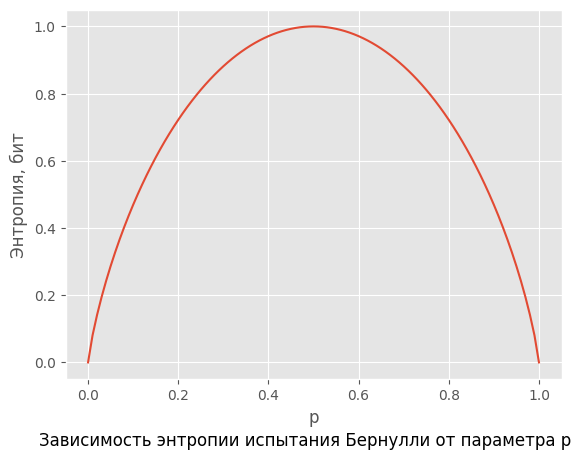

In [3]:
pvals = np.arange(0, 1.01, 0.01)
entropy_vals = [entropy_of_X(bernulli(p)) for p in pvals]
plt.plot(pvals, entropy_vals)
plt.xlabel('p')
plt.ylabel('Энтропия, бит')
plt.suptitle('Зависимость энтропии испытания Бернулли от параметра p', y=0)

In [4]:
def binom_pdistr(p, n=10):
    binom_rv = stat.binom(n=n, p=p)
    Xvals = np.arange(0, n+1, dtype=int)
    p_k = binom_rv.pmf(Xvals)
    return dict(zip(Xvals, p_k))

binom_pdistr(p=0.5, n=3)

{0: 0.125, 1: 0.3750000000000001, 2: 0.3750000000000001, 3: 0.125}

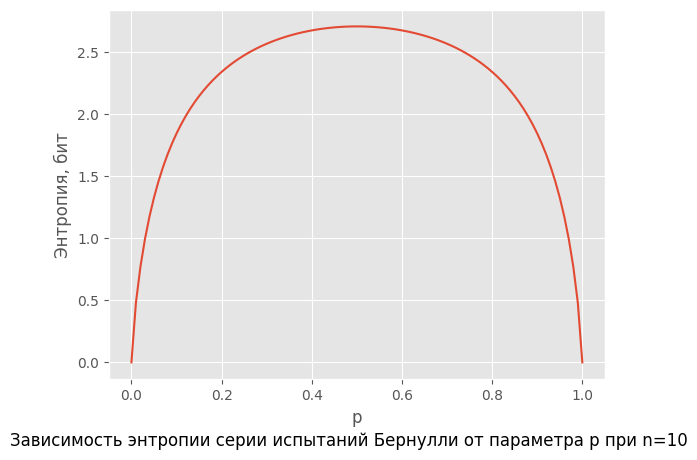

In [7]:
n = 10
pvals = np.arange(0, 1.01, 0.01)
entropy_vals = [entropy_of_X(binom_pdistr(p)) for p in pvals]
plt.plot(pvals, entropy_vals)
plt.xlabel('p')
plt.ylabel('Энтропия, бит')
plt.suptitle(f'Зависимость энтропии серии испытаний Бернулли от параметра p при n={n}', y=0)
plt.show()

[]

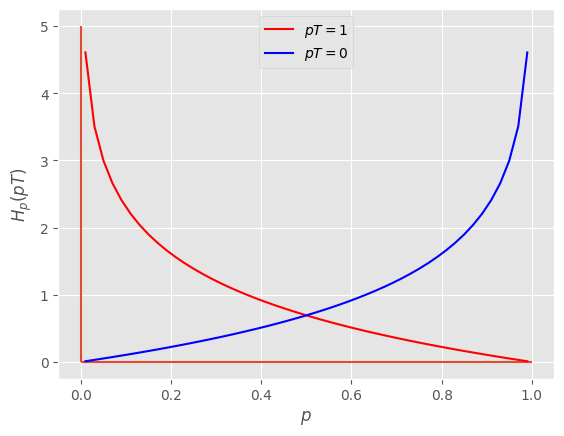

In [8]:
plist = np.arange(0.01, 1, 0.02)
plt.hlines(0, 0, 1)
plt.vlines(0, 0, 5.0)

plt.plot(plist, -np.log(plist), 'r', label='$pT=1$')
plt.plot(plist, -np.log(1-plist), 'b', label='$pT=0$')
plt.xlabel('$p$')
plt.ylabel('$H_p(pT)$')
plt.legend()
plt.plot()